In [11]:
import numpy as np
import utils.dataset as dataset
import utils.plot_utils as plot_utils
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
%matplotlib ipympl


In [12]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


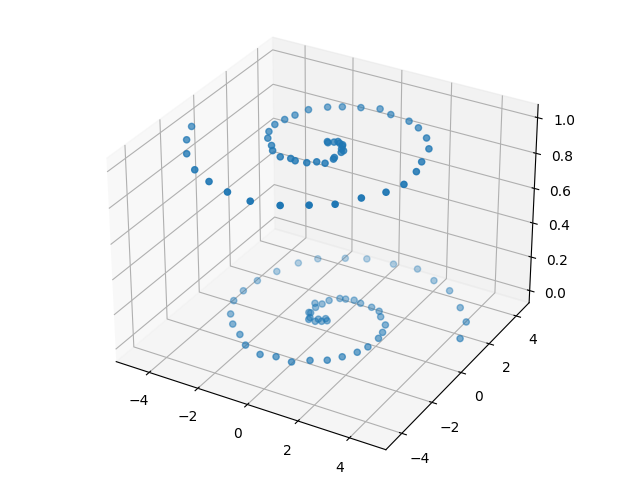

In [13]:
#从数据中获取随机豆豆
m=100
X,Y = dataset.get_beans7(m)
plot_utils.show_scatter(X, Y)

In [17]:

# 创建模型
model = Sequential() 
# 创建一层网络，即隐藏层，含有两个神经元，激活函数使用sigmoid函数，输入特征为2维
model.add(Dense(units=8, activation='relu',input_dim=2 ))
# 再创建一层网络，即输出层，含有一个神经元，激活函数使用sigmoid函数
model.add(Dense(units=8, activation='relu' ))
model.add(Dense(units=8, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))
# 告诉keras使用均方误差代价函数和随机梯度下降算法SGD，学习率为0.05，评估指标选择accuracy
model.compile(loss='mse', optimizer=SGD(learning_rate=0.05),metrics=['accuracy'])
# 开始训练
model.fit(X, Y, epochs=5000, batch_size=10,verbose=0)


259/259 [==============================] - 0s 2ms/step


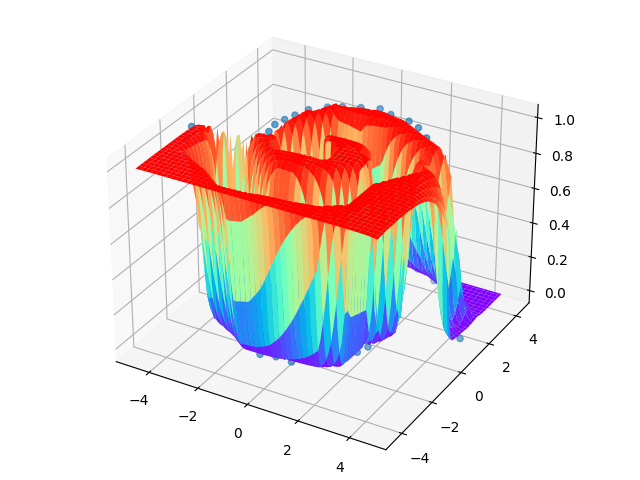

In [18]:
# 训练完毕，进行预测
pres = model.predict(X)

plot_utils.show_scatter_surface(X, Y, model)


In [33]:
print("Weights and biases of the layers after training the model: \n")
for layer in model.layers:
  print(layer.name)
  print("Weights")
  print("Shape: ",layer.get_weights()[0].shape,'\n',layer.get_weights()[0])
  print("Bias")
  print("Shape: ",layer.get_weights()[1].shape,'\n',layer.get_weights()[1],'\n')

Weights and biases of the layers after training the model: 

dense_2
Weights
Shape:  (2, 8) 
 [[-1.3754582  -0.9203265   0.06020659  0.16067334  0.8702033  -0.17704809
  -0.37722975  1.5311502 ]
 [-0.68355244  0.4348601  -1.3807919  -1.5819225  -1.4848105   1.3946548
   1.4256184   1.445511  ]]
Bias
Shape:  (8,) 
 [ 0.05907902  0.0135675   0.5740086  -0.2986566  -0.24042311  0.13679136
 -0.5389276   0.26348084] 

dense_3
Weights
Shape:  (8, 8) 
 [[ 0.09325132  0.07251723  0.7804837  -0.15632473  0.11791266  0.44105414
  -1.4412907   0.9080096 ]
 [ 0.29157156 -0.77655977 -0.14411671  0.4948132   0.37235883 -0.42275715
   0.0377658   0.41987136]
 [ 0.07723691  0.77655387  0.99048394 -0.12342799 -0.30965     0.42465892
  -0.21233022 -0.9179502 ]
 [ 0.49363077 -0.16785356  0.22255021  0.22952898  0.7661131   0.50553924
   0.01814227  1.4595783 ]
 [-0.9138998  -0.16918722  1.0794742   0.09170396  0.7708678   0.2654922
  -0.03911366  1.0954555 ]
 [-0.03045903 -0.9530043  -0.75207436  0.25347

In [22]:
# 模型汇总
model.summary()
# 取各个网络层的配置
model.get_layer(index=0).get_config()

{'name': 'dense_2',
 'trainable': True,
 'batch_input_shape': (None, 2),
 'dtype': 'float32',
 'units': 8,
 'activation': 'relu',
 'use_bias': True,
 'kernel_initializer': {'class_name': 'GlorotUniform',
  'config': {'seed': None}},
 'bias_initializer': {'class_name': 'Zeros', 'config': {}},
 'kernel_regularizer': None,
 'bias_regularizer': None,
 'activity_regularizer': None,
 'kernel_constraint': None,
 'bias_constraint': None}

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 8)                 24        
                                                                 
 dense_3 (Dense)             (None, 8)                 72        
                                                                 
 dense_4 (Dense)             (None, 8)                 72        
                                                                 
 dense_5 (Dense)             (None, 1)                 9         
                                                                 
Total params: 177
Trainable params: 177
Non-trainable params: 0
_________________________________________________________________


In [24]:
# 保存模型
model.save('./model/09_蚊香.h5')


259/259 [==============================] - 1s 3ms/step


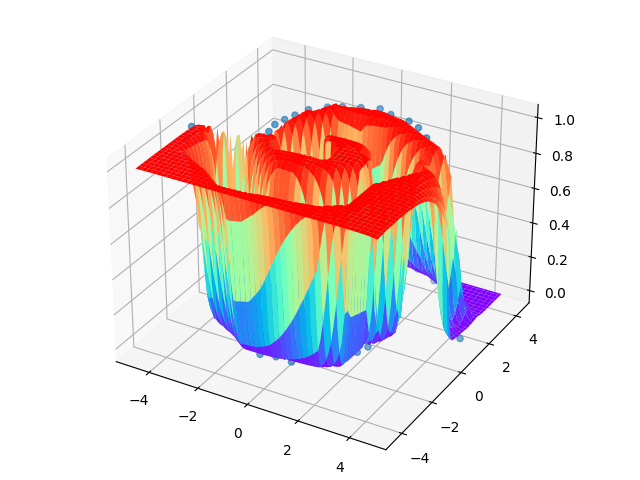

In [30]:
from keras.models import load_model
new_model = load_model('./model/09_蚊香.h5')
new_model.predict(X)
# 训练完毕，进行预测
pres = model.predict(X)

plot_utils.show_scatter_surface(X, Y, model)
